######  IMPORTING LIBRARIES

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

######  IMPORTING DATA

In [3]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


**about the dataset**

* A stroke occurs when the blood supply to part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die in minutes.

* A stroke is a medical emergency, and prompt treatment is crucial. Early action can reduce brain damage and other complications.

In [4]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

###### ABOUT FEATURES:

      
        *  id                : unique identifier
        *  gender            : "Male", "Female" or "Other"
        *  age               : age of the patient
        *  hypertension      : 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
        *  heart_disease     : 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
        *  ever_married      : "No" or "Yes"
        *  work_type         : "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
        *  Residence_type    : "Rural" or "Urban"
        *  avg_glucose_level : average glucose level in blood
        *  bmi               : body mass index
        *  smoking_status    : "formerly smoked", "never smoked", "smokes" or "Unknown"(information is unavailable)
        *  stroke            : 1 if the patient had a stroke or 0 if not <br>

In [5]:
print("NUMBER OF ROWS AND COLUMNS: ",df.shape)

NUMBER OF ROWS AND COLUMNS:  (5110, 12)


In [6]:
print("\nNUMBER OF NON-NULL VALUES: \n",df.count())


NUMBER OF NON-NULL VALUES: 
 id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
stroke               5110
dtype: int64


In [7]:
print("\nNUMBER OF NULL VALUES: \n",df.isnull().sum())



NUMBER OF NULL VALUES: 
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [8]:
print("\nNUMBER OF UNIQUE VALUES IN EACH FEATURES: \n",df.nunique())


NUMBER OF UNIQUE VALUES IN EACH FEATURES: 
 id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64


In [9]:
print("\nDATA TYPES OF EACH FEATURE: \n",df.dtypes)


DATA TYPES OF EACH FEATURE: 
 id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


<Axes: >

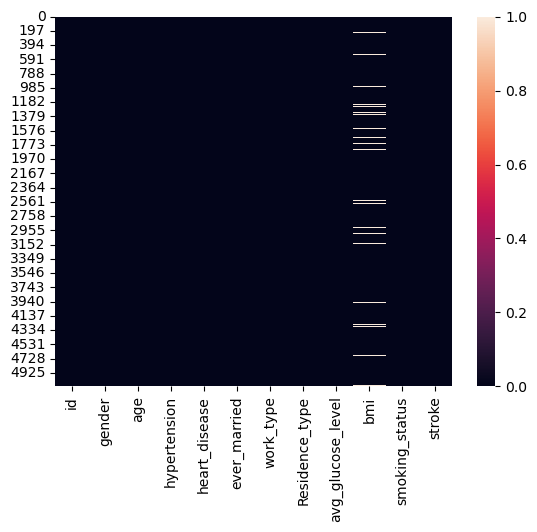

In [10]:
# use heeatmap to see null values
sns.heatmap(df.isnull())

###### DESCRIPTIVE ANALYSIS

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


- BMI contains missing values.
- The average age is 43.
- The average bmi is 28 .
- The minimum age is questionable.
- Average glucose level is 106 .

In [12]:
# filling nan values with mean
df["bmi"].fillna(df["bmi"].mean(),inplace=True)

In [13]:
df["bmi"].isnull().sum()

0

In [14]:
# now the null values are replaced with the mean

In [15]:
df.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3057,7799,Female,79.0,0,0,No,Self-employed,Urban,77.59,33.0,never smoked,0
3873,72041,Male,23.0,0,0,No,Private,Urban,82.53,20.7,smokes,0
1386,51959,Male,12.0,0,0,No,children,Rural,81.74,28.3,Unknown,0
800,51125,Female,66.0,0,0,Yes,Private,Urban,89.70,34.9,smokes,0
186,16077,Male,63.0,0,1,Yes,Self-employed,Urban,116.69,34.5,formerly smoked,1
2837,9730,Male,27.0,0,0,Yes,Private,Urban,76.19,22.0,never smoked,0
1921,727,Male,44.0,0,0,Yes,Private,Rural,95.46,31.4,smokes,0
864,13907,Male,65.0,0,0,Yes,Self-employed,Rural,94.64,28.6,never smoked,0
404,55810,Female,61.0,0,0,Yes,Self-employed,Rural,93.48,23.7,Unknown,0
2367,9013,Female,35.0,0,0,Yes,Private,Rural,83.27,19.8,formerly smoked,0


###### BOX PLOT

**People of which age group are more likely to get a stroke?**

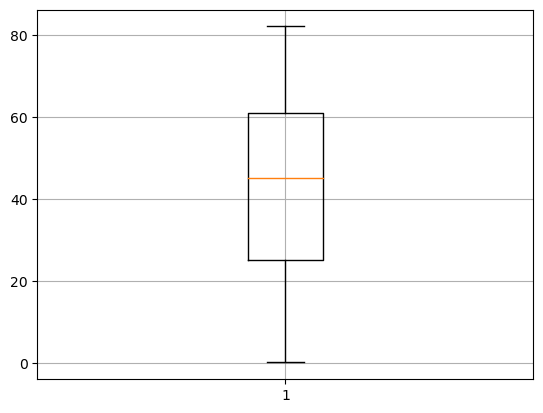

In [16]:
plt.boxplot("age",data=df)
plt.grid()

- Age mostly distributed between approximately 25 and 62

###### CATEGORICAL ANALYSIS

In [17]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

'gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                       'smoking_status', 'stroke'

In [18]:
df["stroke"].unique()

array([1, 0], dtype=int64)

**Male/Female who has more strokes?**

Text(0.5, 1.0, 'Stroke /Gender')

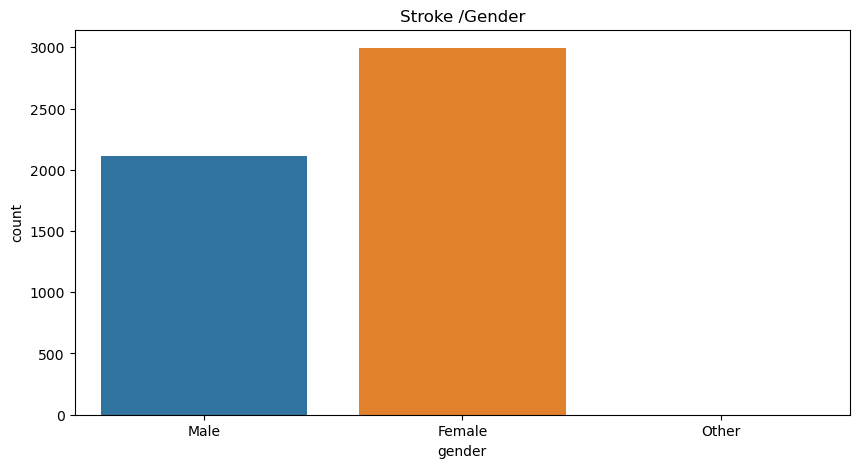

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='gender')
plt.title("Stroke /Gender")

- females are mostly affected with stroke

**Marriage may be a cause of strokes?**

Text(0.5, 1.0, 'Stroke VS Marriage')

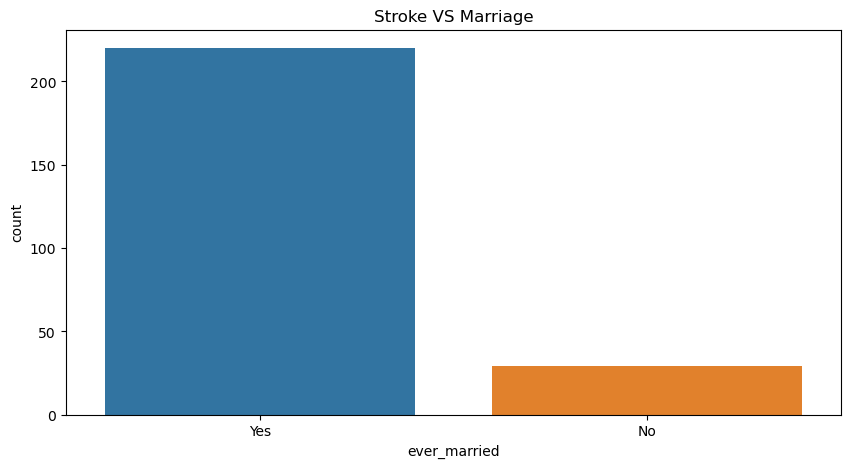

In [20]:
plt.figure(figsize=(10,5))
stroke = df.loc[df['stroke']==1]
sns.countplot(data=stroke,x='ever_married')
plt.title("Stroke VS Marriage")

- Looks like  the number of married people tend to have stroke significantly higher than single people

**People working in which jobs sector may be the majority of people with strokes?**

Text(0.5, 1.0, 'Stroke VS Work_type')

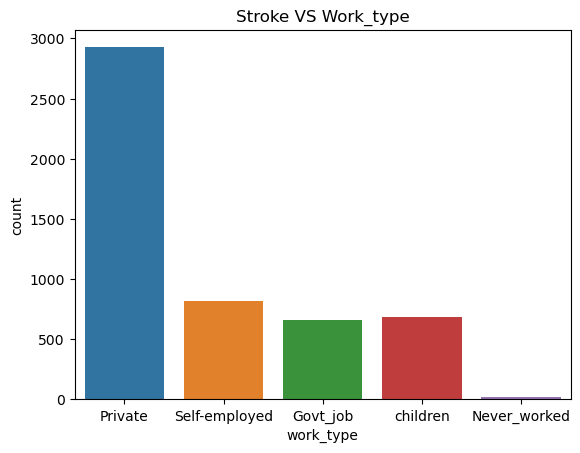

In [21]:

sns.countplot(x="work_type",data=df)
plt.title("Stroke VS Work_type")

- People in private sector has higher risk of having a stroke

**People living in urban areas have more chances of getting stroke?**

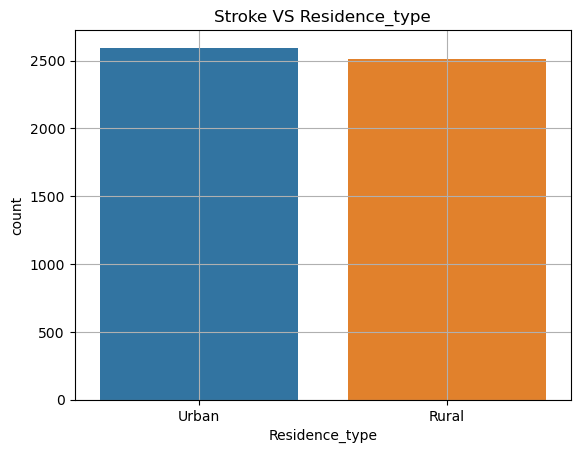

In [22]:
sns.countplot(x="Residence_type",data=df)
plt.title("Stroke VS Residence_type")
plt.grid()

- close distribution of rural and urban type of residence. Looks like it does not effect much

**People who smoke are more likely to get a stroke?**

Text(0.5, 1.0, 'Stroke VS Smoking_status')

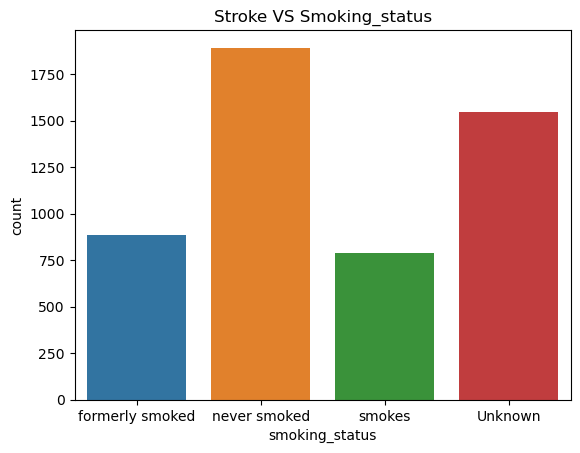

In [23]:
sns.countplot(x="smoking_status",data=df)
plt.title("Stroke VS Smoking_status")

-  former smokers and currently smokers has the highest risk

**Is hypertension a cause?**

Text(0.5, 1.0, 'Stroke VS Hypertension')

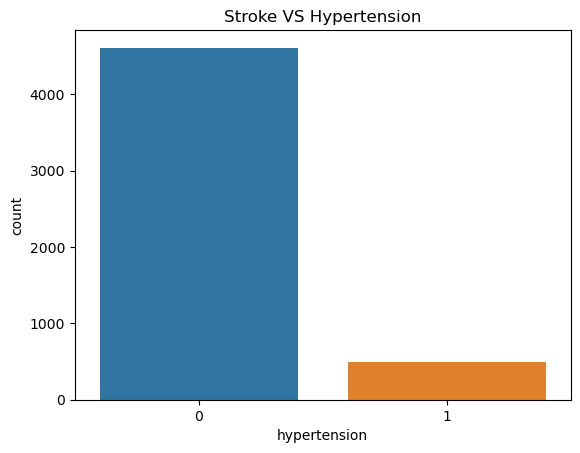

In [24]:
sns.countplot(x="hypertension",data=df)
plt.title("Stroke VS Hypertension")


- People without hypertension has more risk to have a stroke

**A person with heart disease is more likely to get a stroke?**

Text(0.5, 1.0, 'Stroke VS Heart_disease')

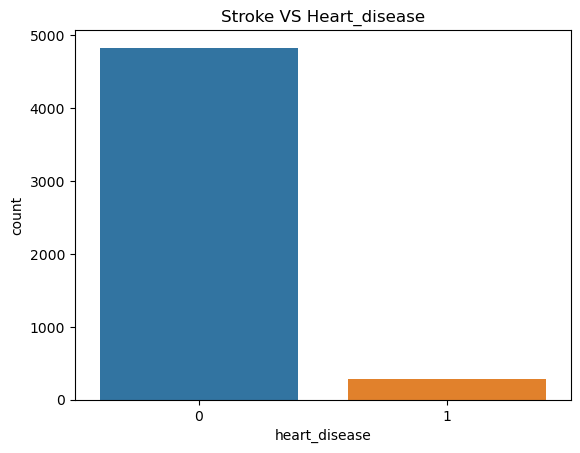

In [25]:
sns.countplot(x="heart_disease",data=df)
plt.title("Stroke VS Heart_disease")

- People without any previous heart disease has more risk to have a stroke

###### GLUCOSE LEVEL

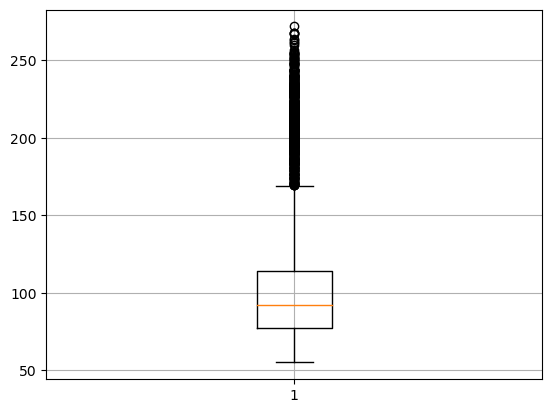

In [26]:
plt.boxplot("avg_glucose_level",data=df)
plt.grid()

In [27]:
df["avg_glucose_level"].max()

271.74

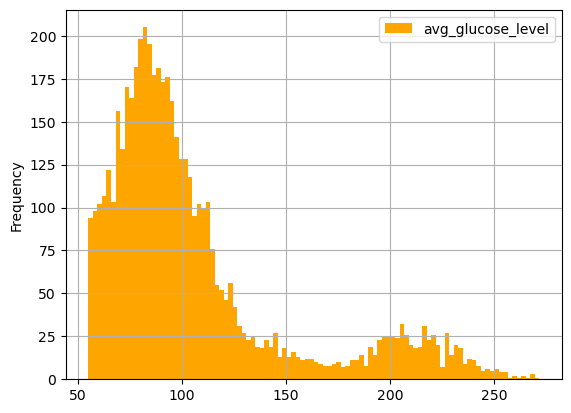

In [28]:
df.plot(kind="hist", y="avg_glucose_level", bins=100, color="orange")
plt.grid()
plt.show()

-  distribution of avg_glucose_level is between 50-150 mostly.

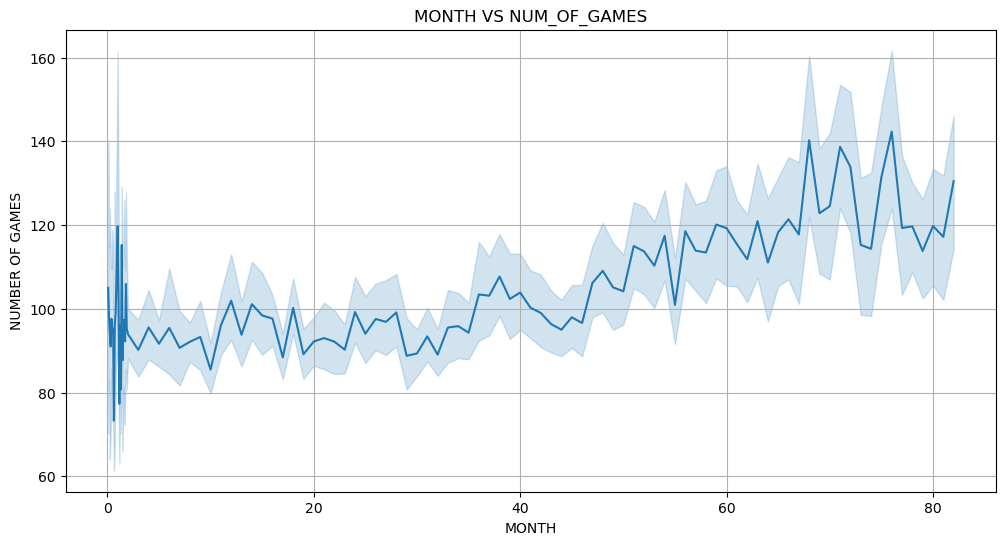

In [29]:
plt.figure(figsize = (12,6))
sns.lineplot(data = df, x = "age" , y = "avg_glucose_level")
plt.title("MONTH VS NUM_OF_GAMES")
plt.xlabel("MONTH")
plt.ylabel("NUMBER OF GAMES")
plt.grid()
plt.show()

###### BMI

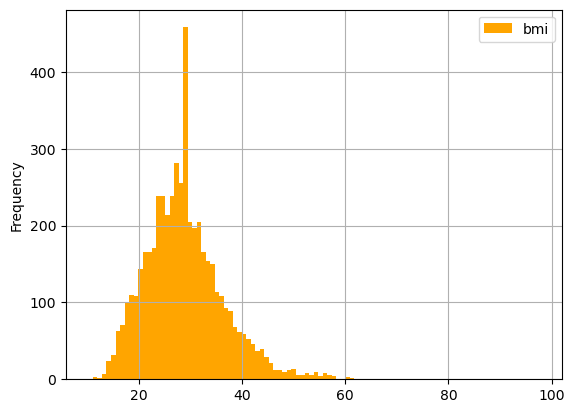

In [30]:
df.plot(kind="hist", y="bmi", bins=100, color="orange")
plt.grid()
plt.show()

- bmi is between 0 and 50 for most of the people

**CONCLUSION**

stroke mostly affected :
- Age mostly distributed between approximately 25 and 62
- females are mostly affected with stroke
- the number of married people tend to have stroke significantly higher than single people
- People in private sector has higher risk of having a stroke
- close distribution of rural and urban type of residence. Looks like it does not effect much
- former smokers and currently smokers has the highest risk
- People without hypertension has more risk to have a stroke
- People without any previous heart disease has more risk to have a stroke
- distribution of avg_glucose_level is between 50-150 mostly
- bmi is between 0 and 50 for most of the people
